## Example Usage for SurFF

------------------------------------------

PLease install the required packages and download neccessary data files before running the code below.



# Preparation
First, download the `SurFF_CoreDataFiles.zip`,
```bash
unzip SurFF_CoreDataFiles.zip
```
The structure of `SurFF_CoreDataFiles` is:

```
SurFF_CoreDataFiles/
├── Data/
│   ├── example/                # Original data folder
│   │   ├── bulks/              # Crystal file
│   │   ├── crystal_structures/ # POSCAR file
│   │   ├── slabs/              # Surface file
│   │   └── lmdb/               
│   │       └── relax_example.sh # Bash file to run the relaxation
├── ocp/                        
│   ├── checkpoints/            # MLFF model weights
│   └── data/
│   │   └── example/            # Store the lmdb file
│   └── traj/                   
│       └── example/            # Store the traj file
└── results/                    
    ├── example/                # Save final result
    └── run_wulff.py            # Wulff construction
```

In [3]:
! unzip SurFF_CoreDataFiles.zip

! mkdir Data/example/
! mkdir ocp/data/
! mkdir ocp/traj/
! mkdir ocp/data/example/
! mkdir ocp/traj/example/
! mkdir results
! mkdir results/example/


! mv SurFF_CoreDataFiles/Data/example/crystal_structures/ Data/example/
! mv SurFF_CoreDataFiles/Data/example/lmdb/ Data/example/
! mv SurFF_CoreDataFiles/ocp/checkpoints/ ocp/
! mv SurFF_CoreDataFiles/results/run_wulff.py results/

Archive:  SurFF_CoreDataFiles.zip
   creating: SurFF_CoreDataFiles/
   creating: SurFF_CoreDataFiles/Data/
   creating: SurFF_CoreDataFiles/Data/example/
   creating: SurFF_CoreDataFiles/Data/example/bulks/
  inflating: SurFF_CoreDataFiles/Data/example/bulks/101_0  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/101_1  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/101_2  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/101_3  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/101_4  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/101_5  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/102_0  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/102_1  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/102_10  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/102_11  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/102_12  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/102_13  
  inflating: SurFF_CoreDataFiles/Data/example/bulks/102_2  
  inflati

## Surface Structure Generation

---------


We prepare the structures of crystals to be predicted.
Here we have 5 crystal structures in POSCAR format in the folder below:

`Data/example/crystal_structures/`


In [1]:
# get all files in the folder
import os

folder = r'Data/example/crystal_structures'
files = os.listdir(folder)
print(files)

['101', '102', '103', '104', '105']


View the structure of crystal, if the server does not support gui, you can download the POSCAR file and view on your laptop

In [16]:
# Let first visualize the one structure using `ase` package
from ase.io import read

structure = read(os.path.join(folder, files[0]), format='vasp')

print(structure)

# plot the structure
from ase.visualize import view

view(structure)

Atoms(symbols='VRu', pbc=True, cell=[[3.0066234144699884, 0.0, 2e-16], [5e-16, 3.0066234144699884, 2e-16], [0.0, 0.0, 3.0066234144699884]])


<Popen: returncode: None args: ['D:\\anaconda\\envs\\ocpmodel\\python.exe', ...>

In [9]:
import pandas as pd
# We then generate the required unique surface structures of the crystals.
from functionals.gen_bulk_slab import process_structure_sep

slab_dir = r"Data/example/slabs" # the folder to save the surface slab structures
bulk_dir = r"Data/example/bulks" # the folder to save the corresponding OUC bulk structures (not used in this tutorial)

info = []
for poscar in files:
    slab_info = process_structure_sep(crystal_id=int(poscar), # a unique id for each crystal
                          slab_dir=slab_dir, 
                          bulk_dir=bulk_dir, 
                          source_dir=folder) # the folder where the crystal structures are stored
    info.extend(slab_info)


# check the generated surface structures
info = pd.DataFrame(info, columns=['slab_id', 'formula', 'miller_index', 'shift', 'num_atom'])
print(info)

   slab_id  formula miller_index     shift  num_atom
0    101_0   V1 Ru1          111  0.250000        12
1    101_1   V1 Ru1          110  0.500000        10
2    101_2   V1 Ru1          100  0.250000         8
3    101_3   V1 Ru1          221  0.125000        20
4    101_4   V1 Ru1          211  0.250000        40
5    101_5   V1 Ru1          210  0.125000        16
6    102_0  Zr6 Pb2          111  0.125000        32
7    102_1  Zr6 Pb2          110  0.250000        32
8    102_2  Zr6 Pb2          101  0.125000        24
9    102_3  Zr6 Pb2          101  0.375000        24
10   102_4  Zr6 Pb2          100  0.250000        24
11   102_5  Zr6 Pb2          001  0.125000        16
12   102_6  Zr6 Pb2          221  0.062500        64
13   102_7  Zr6 Pb2          212  0.125000        48
14   102_8  Zr6 Pb2          211  0.062500        96
15   102_9  Zr6 Pb2          211  0.187500        96
16  102_10  Zr6 Pb2          210  0.125000        48
17  102_11  Zr6 Pb2          201  0.062500    

In [18]:
# Let us check the generated surface structures
slab_files = os.listdir(slab_dir)
print(slab_files)


['101_0', '101_1', '101_2', '101_3', '101_4', '101_5', '102_0', '102_1', '102_10', '102_11', '102_12', '102_13', '102_2', '102_3', '102_4', '102_5', '102_6', '102_7', '102_8', '102_9', '103_0', '103_1', '103_2', '103_3', '103_4', '103_5', '103_6', '104_0', '104_1', '104_10', '104_11', '104_2', '104_3', '104_4', '104_5', '104_6', '104_7', '104_8', '104_9', '105_0', '105_1', '105_10', '105_11', '105_12', '105_13', '105_14', '105_15', '105_16', '105_17', '105_18', '105_19', '105_2', '105_20', '105_3', '105_4', '105_5', '105_6', '105_7', '105_8', '105_9', 'info.csv']


In [19]:
# Let first visualize the one structure using `ase` package
structure = read(os.path.join(slab_dir, slab_files[0]), format='vasp')
print(structure)

view(structure)

Atoms(symbols='VRuVRuVRuVRuVRuVRu', pbc=True, cell=[[3.0066234144699884, 0.0, -3.006623414469988], [-2e-16, 3.0066234144699884, -3.006623414469988], [0.0, 0.0, 45.09935121704983]], constraint=FixAtoms(indices=[4, 5, 6, 7]))


<Popen: returncode: None args: ['D:\\anaconda\\envs\\ocpmodel\\python.exe', ...>

## Surface Relaxation

-------------

We then predict the surface energies of the generated surface structures by relaxing the structures using a MLFF model.

In [20]:
# We first compile all the surface structures into a single lmdb file
from functionals.gen_lmdb_relaxation import gen_lmdb

# prepare a list of slabs info
dataset = [{'slab_id': files, "POSCAR_pth": os.path.join(slab_dir, files)} for files in slab_files]

gen_lmdb(dataset=dataset, 
         DB_path= r"ocp/data/example/surface_relaxation.lmdb", # the path to save the lmdb file
         )

100%|██████████| 61/61 [00:00<00:00, 711.58it/s]

Error processing item 60: tuple index out of range
save to ocp/data/example/surface_relaxation.lmdb


In [2]:
# We then relax the surface structures using the MLFF model

# change the working directory to the root folder of the MLFF
os.chdir(r"ocp")


If you have gpu, change the `--cpu` to `--local_rank ${id}` in relax_example.sh

For CPU inference, please be patient as it may take a few minutes to finish the relaxation.

In [3]:
!bash ../Data/example/lmdb/relax_example.sh

2024-07-15 16:08:48 (INFO): Project root: D:\OneDrive\OneDrive - National University of Singapore\Pyprojects\Intermetallic_Crystal_Nanoparticle_Model\ocp
2024-07-15 16:08:50 (INFO): amp: true
cmd:
  checkpoint_dir: ./checkpoints\2024-07-15-16-08-32
  commit: e52104b
  identifier: ''
  logs_dir: ./logs\tensorboard\2024-07-15-16-08-32
  print_every: 10
  results_dir: ./results\2024-07-15-16-08-32
  seed: 0
  timestamp_id: 2024-07-15-16-08-32
dataset:
  grad_target_mean: 0.0
  grad_target_std: 1
  normalize_labels: false
  src: data/example
  target_mean: 0
  target_std: 1
gpus: 0
logger: tensorboard
model: equiformer_v2
model_attributes:
  alpha_drop: 0.1
  attn_activation: silu
  attn_alpha_channels: 64
  attn_hidden_channels: 64
  attn_value_channels: 16
  distance_function: gaussian
  drop_path_rate: 0.0
  edge_channels: 128
  ffn_activation: silu
  ffn_hidden_channels: 128
  grid_resolution: 18
  lmax_list:
  - 4
  max_neighbors: 20
  max_num_elements: 90
  max_radius: 6.0
  mmax_lis

2024-07-15 16:08:51 (WARNING): Model gradient logging to tensorboard not yet supported.

100%|██████████| 30/30 [22:32<00:00, 45.07s/it]


In [6]:
os.chdir(r"../")
# The relaxation resutls would be stored in the folder below
traj_folder= r"ocp/traj/example"

trajs = os.listdir(traj_folder)
print(trajs)


['101_0.traj', '101_1.traj', '101_2.traj', '101_3.traj', '101_4.traj', '101_5.traj', '102_0.traj', '102_1.traj', '102_10.traj', '102_11.traj', '102_12.traj', '102_13.traj', '102_2.traj', '102_3.traj', '102_4.traj', '102_5.traj', '102_6.traj', '102_7.traj', '102_8.traj', '102_9.traj', '103_0.traj', '103_1.traj', '103_2.traj', '103_3.traj', '103_4.traj', '103_5.traj', '103_6.traj', '104_0.traj', '104_1.traj', '104_10.traj', '104_11.traj', '104_2.traj', '104_3.traj', '104_4.traj', '104_5.traj', '104_6.traj', '104_7.traj', '104_8.traj', '104_9.traj', '105_0.traj', '105_1.traj', '105_10.traj', '105_11.traj', '105_12.traj', '105_13.traj', '105_14.traj', '105_15.traj', '105_16.traj', '105_17.traj', '105_18.traj', '105_19.traj', '105_2.traj', '105_20.traj', '105_3.traj', '105_4.traj', '105_5.traj', '105_6.traj', '105_7.traj', '105_8.traj', '105_9.traj']


In [7]:
# let us visualize the one relaxation trajectory
from ase.io import read
from ase.visualize import view

traj = read(os.path.join(traj_folder, trajs[0]), format='traj', index=':')
view(traj)

print(traj[0])

Atoms(symbols='VRuVRuVRuVRuVRuVRu', pbc=True, cell=[[3.0066235065460205, 0.0, -3.0066235065460205], [-2.000000033724767e-16, 3.0066235065460205, -3.0066235065460205], [0.0, 0.0, 45.09934997558594]], tags=..., constraint=FixAtoms(indices=[4, 5, 6, 7]), calculator=SinglePointCalculator(...))


## Surface Exposure

------------------


In [10]:
from results.run_wulff import run_wulff
import pandas as pd
predict_dir = r"ocp/traj/example"

run_wulff(predict_dir, info=info,
              crystal_dir=folder,
              save_dir=r"results/example")

predict_traj_dir: ocp/traj/example
info:    slab_id  formula miller_index     shift  num_atom
0    101_0   V1 Ru1          111  0.250000        12
1    101_1   V1 Ru1          110  0.500000        10
2    101_2   V1 Ru1          100  0.250000         8
3    101_3   V1 Ru1          221  0.125000        20
4    101_4   V1 Ru1          211  0.250000        40
5    101_5   V1 Ru1          210  0.125000        16
6    102_0  Zr6 Pb2          111  0.125000        32
7    102_1  Zr6 Pb2          110  0.250000        32
8    102_2  Zr6 Pb2          101  0.125000        24
9    102_3  Zr6 Pb2          101  0.375000        24
10   102_4  Zr6 Pb2          100  0.250000        24
11   102_5  Zr6 Pb2          001  0.125000        16
12   102_6  Zr6 Pb2          221  0.062500        64
13   102_7  Zr6 Pb2          212  0.125000        48
14   102_8  Zr6 Pb2          211  0.062500        96
15   102_9  Zr6 Pb2          211  0.187500        96
16  102_10  Zr6 Pb2          210  0.125000        48
17  1

100%|██████████| 60/60 [00:00<00:00, 487.59it/s]


total 5 crystals, 60 slabs, start Wulff analysis


100%|██████████| 5/5 [00:00<00:00, 28.24it/s]


Save results to results/example\wulff_results.pkl
Save wulff results to results/example\wulff_results.csv
Start save wulff shape to results/example\wulff_shape


100%|██████████| 5/5 [00:00<00:00,  6.67it/s]

save wulff shape to results/example\wulff_shape
Complete!


In [11]:
# let view the predicted results
results_csv = r"results/example/wulff_results.csv"
results = pd.read_csv(results_csv)
print(results)

    crystal_id slab_id     miller    shift  surface_energy_pred  area_pred
0          102   102_0  (1, 1, 1)  0.12500              0.08550    0.00000
1          102   102_1  (1, 1, 0)  0.25000              0.09087    0.00000
2          102  102_10  (2, 1, 0)  0.12500              0.09516    0.00000
3          102  102_11  (2, 0, 1)  0.06250              0.09141    0.00000
4          102  102_12  (1, 1, 2)  0.50000              0.07198    0.77036
5          102  102_13  (1, 0, 2)  0.25000              0.09145    0.00000
6          102   102_2  (1, 0, 1)  0.12500              0.09131    0.00119
7          102   102_3  (1, 0, 1)  0.37500              0.09726    0.00000
8          102   102_4  (1, 0, 0)  0.25000              0.08198    0.14439
9          102   102_5  (0, 0, 1)  0.12500              0.08457    0.08405
10         102   102_6  (2, 2, 1)  0.06250              0.08881    0.00000
11         102   102_7  (2, 1, 2)  0.12500              0.08638    0.00000
12         102   102_8  (

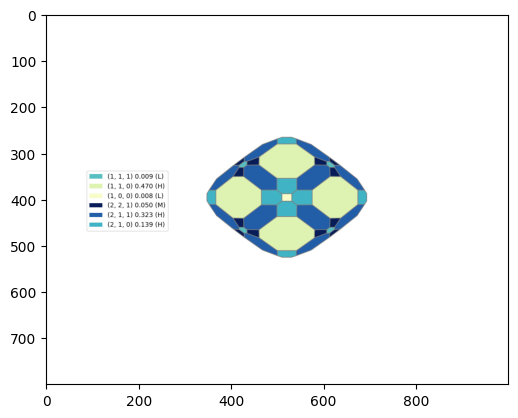

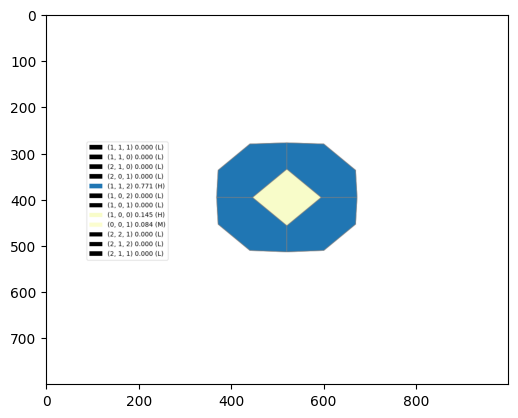

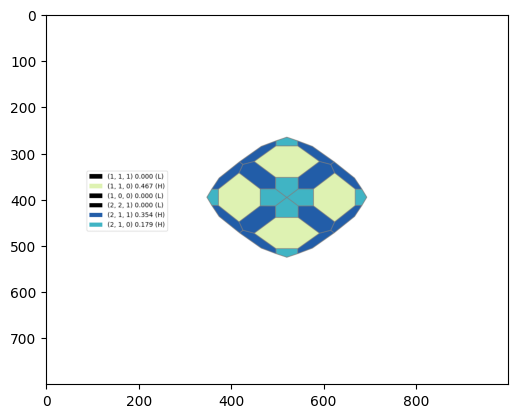

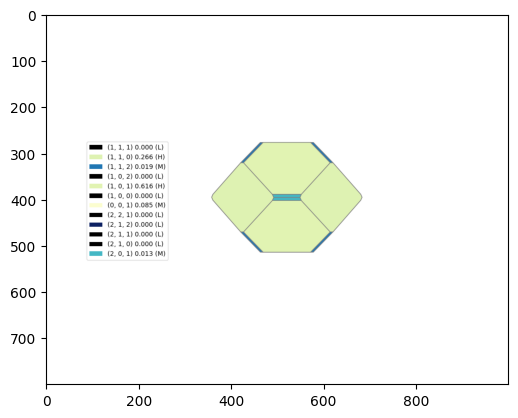

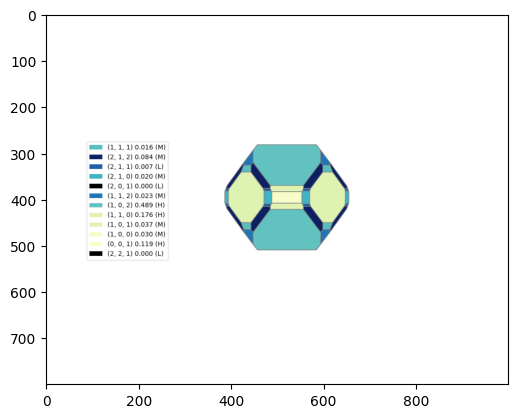

In [12]:
# let view the predicted shape and surface exposure
image_dir = r"results/example/wulff_shape"
images = os.listdir(image_dir)

# plot the .png image
import matplotlib.pyplot as plt

for image in images:
    img = plt.imread(os.path.join(image_dir, image))
    plt.imshow(img)
    plt.show()